In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n = 100

A tensor is any array of the form n1 X n2

In [3]:
x = torch.ones(n,2) #This will basically create a n X 2 matrix with ones
x[:,0].uniform_(-1,1.) #Filling column one with random values from -1 to 1
x[:5]

tensor([[-0.5844,  1.0000],
        [ 0.5512,  1.0000],
        [ 0.3660,  1.0000],
        [-0.7920,  1.0000],
        [ 0.2504,  1.0000]])

In [4]:
a = tensor(3.,2);a

tensor([3., 2.])

In [5]:
y = x@a + torch.rand(n)

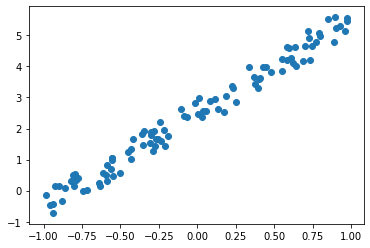

In [6]:
plt.scatter(x[:,0],y); #Basically all rows, i.e [rows,columns] ,of first column

We have to calculate the value of a which will be an unknown value.
# MSE

In [7]:
def mse(y_hat,y): return((y_hat-y)**2).mean()

In [8]:
#Say we have a tensor = (-1.0,1.0) then y_hat is our prediction

In [9]:
a = tensor(-1,1.);a

tensor([-1.,  1.])

In [10]:
y_hat = x@a
mse(y_hat,y)

tensor(7.5696)

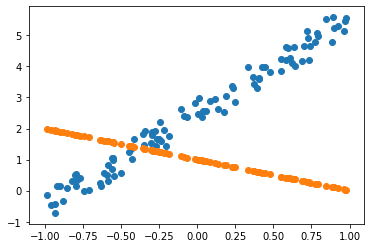

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

Now, ***Gradient Descent***

Note
* Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

In [12]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [13]:
def update():
    y_hat = x@a
    loss = mse(y,y_hat)
    if t%10 == 0: print(loss) #Printing loss at regular interval
    loss.backward() #we are finding the derivative of the loss function aka the cost function(Refer Coursera notes)
    with torch.no_grad():
        a.sub_(lr*a.grad) #subtracting the gradient to minimise loss function.(Refer coursera notes)
        a.grad.zero_()

In [14]:
lr = 1e-1
for t in range(100):update()

tensor(7.5696, grad_fn=<MeanBackward0>)
tensor(1.4493, grad_fn=<MeanBackward0>)
tensor(0.4006, grad_fn=<MeanBackward0>)
tensor(0.1530, grad_fn=<MeanBackward0>)
tensor(0.0935, grad_fn=<MeanBackward0>)
tensor(0.0791, grad_fn=<MeanBackward0>)
tensor(0.0757, grad_fn=<MeanBackward0>)
tensor(0.0748, grad_fn=<MeanBackward0>)
tensor(0.0746, grad_fn=<MeanBackward0>)
tensor(0.0746, grad_fn=<MeanBackward0>)


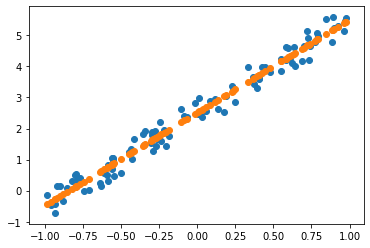

In [15]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach())

# *ANIMATE IT*

In [16]:
from matplotlib import animation,rc
rc('animation',html='html5')

In [17]:
a = nn.Parameter(tensor(-1,1.))

fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig,animate,np.arange(0,100),interval=20)
